## INITIALIZATION

In [1]:
%matplotlib notebook
from tjmonopix.tjmonopix import TJMonoPix
import numpy as np
import matplotlib.pyplot as plt
import time

##### if HV is on, no_power_reset=True,
##### if GPAC had power reset then no_power_reset=False

chip = TJMonoPix(conf="../tjmonopix/tjmonopix_mio3.yaml",no_power_reset=True)
chip.init(fl="EN_HV")

chip['data_rx'].CONF_START_FREEZE = 64 #default 3
chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
chip['data_rx'].CONF_START_READ = 66 #default 6
chip['data_rx'].CONF_STOP_READ = 68 #default 7
chip['data_rx'].CONF_STOP = 105 #default 45


2019-04-04 20:58:11,643 [INFO ] (MainThread) ########GPAC                 #####
2019-04-04 20:58:11,645 [INFO ] (MainThread) ########SKIPPING POWER RESET #####
2019-04-04 20:58:13,348 [INFO ] (MainThread) Found adapter card: General Purpose Analog Card with ID 8
2019-04-04 20:58:13,591 [INFO ] (MainThread) Found board 0 running firmware version 0.5


FPGA module basil.HL.tlu does not satisfy version requirements (read: 10, require: ==11)
VSRC2 999
VSRC0 2601
PWR0 2111
PWR3 2066
PWR2 2093
PWR1 2090


2019-04-04 20:58:13,813 [WARNI] (MainThread) INJ1 DAC value reached maximum value


INJ0 400
INJ1 7200


2019-04-04 20:58:14,319 [INFO ] (MainThread) {'VPC [V]': 1.3002327889999996, 'VDDA_DAC [mA]': 2.0039990762671183, 'VDDP [V]': 1.776226446339017, 'VDDD [V]': 1.7994442140000002, 'VDDA [mA]': 2.0408066105502796, 'VPC [mA]': -0.5445021598204938, 'VDDD [mA]': 0.5009997250796382, 'VPCSWSF [V]': 0.5000079, 'VDDP [mA]': 87.3733442595446, 'BiasSF [V]': 1.0620227691578945, 'VPCSWSF [mA]': 0.007035208255681085, 'VDDA [V]': 1.7965010210420842, 'VDDA_DAC [V]': 1.7977220453172207, 'BiasSF [mA]': 0.10088749999999999}


## POWER_STATUS

In [2]:
#chip['BiasSF'].set_current(100, unit='uA') # SET THE SOURCE FOLLOWER READOUT CURRENT
chip.get_power_status()

{'BiasSF [V]': 1.0615227850263156,
 'BiasSF [mA]': 0.10088749999999999,
 'VDDA [V]': 1.7965010210420842,
 'VDDA [mA]': 2.551008243121437,
 'VDDA_DAC [V]': 1.7977220453172207,
 'VDDA_DAC [mA]': 2.0039990762671183,
 'VDDD [V]': 1.7984442730000003,
 'VDDD [mA]': 0.5009997250796382,
 'VDDP [V]': 1.776226446339017,
 'VDDP [mA]': 87.3733442595446,
 'VPC [V]': 1.3002327889999996,
 'VPC [mA]': 0.39150157316233714,
 'VPCSWSF [V]': 0.5000079,
 'VPCSWSF [mA]': -0.08341732338094715}

## ENABLE_COLUMS (SET MASKS, SELECT WHICH COLUMN AND ROW TO INJECT)

In [3]:
# SELECT WHICH DOUBLE COLUMNS TO ENABLE
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_HV'].setall(True)
chip['CONF_SR']['EN_OUT'].setall(False) #ENABLES OR DISABLES THE NORMAL OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['nEN_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['EN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE NORMAL HITOR PADS, HITOR0-3 =  1-4 flavor, ACTIVE LOW
chip['CONF_SR']['nEN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY HITOR PADS, ACTIVE LOW


# SELECT WHICH PHYSICAL COLUMNS, ROWS, DIAGONALS TO MASK
# TO MASK ONE PIXEL, MASKV, MASKH and MASKD OF THIS PIXEL SHOULD BE 0 (FALSE)
# THE MASKD NUMBER OF THE PIXEL WE WANT TO MASK (or UNMASK), IS GIVEN BY: MASKD = PHYSCOL- PHYSROW
# IF PHYSCOL-PHYSROW<0, then MASKD = 448+PHYSCOL-PHYSROW
#chip['CONF_SR']['MASKD'].setall(True)
#chip['CONF_SR']['MASKH'].setall(True)
#chip['CONF_SR']['MASKV'].setall(True)

# TO USE THE MASK FUNCTION YOU MUST INPUT THE FLAVOR, COLUMN AND ROW
# THE FLAVOR NUMERS IS: 0 FOR PMOS_NOSF, 1 FOR PMOS, 2 FOR COMP, 3 FOR HV


# SELECT WHICH PHYSICAL COLUMS TO INJECT
# INJ_IN_MON_L AND INJ_IN_MON_L SELECT THE LEFT AND RIGHT SPECIAL ANALOG MONITORING PIXELS
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)

chip['CONF_SR']['INJ_IN_MON_L'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS LEFT SIDE
chip['CONF_SR']['INJ_IN_MON_R'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS RIGHT SIDE

# SELECT WHICH PHYSICAL ROWS TO INJECT
# THE SPEXIAL PIXELS OUTA_MON3 to OUTA_MON0 CORRESPONT TO ROWS 223 to 220 FOR INJECTION
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['INJ_ROW'][223:220] = True # FOR THE ANALOG MONITORING TOP PIXEL

# SELECT PHYSICAL COLUMNS AND ROWS FOR INJECTION WITH FUNCTION
#chip.enable_injection(3,18,99)

# SELECT PHYSICAL COLUMN(S) FOR HITOR OUTPUT
# nMASKH (SO SETTING MASKH TO FALSE) ENABLES HITOR FOR THE SPECIFIC ROW
chip['CONF_SR']['DIG_MON_SEL'].setall(False)
#chip.enable_column_hitor(1,18)

chip.write_conf()

## CONFIGURE THE FRONT END CURRENT AND VOLTAGE BIASES, CONFIGURE THE HEIGHT OF THE INJECTION PULSE

In [131]:
## SET THE INJECTION PULSE AMPLITUDE
## 128-bit DAC (7-bit binary equivalent)
## SET THE VOLTAGES IN ONE HOT ENCODING, ONLY ONE BIT ACTIVE AT A TIME.
## V = (127/1.8)*#BIT
# The default values are VL=44, VH=79, VH-VL=35
# VDAC LSB=14.17mV, Cinj=230aF, 1.43e-/mV, ~710e-
CALCAP=33 ## 33 or 14.17E-3*230E-18/1.602E-19=20.3
chip.set_vl_dacunits(40,1)
chip.set_vh_dacunits(80,1)

####### CONFIGURE THE FRONT END ######

# SET VRESET_P, THIS IS THE BASELINE OF THE FRONT END INPUT, ONE HOT ENCODING
chip.set_vreset_dacunits(35,1) #1V

## 128-bit DAC (7-bit binary equivalent)
## SET THE CURRENTS USING THERMOMETER ENCODING, I = #BITS_ACTIVE*140nA*SCALING, SCALING IS DIFFERENT FOR EACH CURRENT
## SCALING: IBIAS=10, IDB=16, ITHR=0.125, ICASN=4, IRESET=0.03125
## ACTIVE BITS SHOULD BE SET STARTING FROM THE MIDDLE e.g. for 15 active bits, (128-15)/2=56,5 so 56zeros,15ones,57zeros
## Thus, Ix[71:57] = True

# SET ICASN, THIS CURRENT CONTROLS THE OUTPUT BASELINE, BE CAREFUL NOT TO SET IT TO HIGH
# ALWAYS MONITOR THE POWER AFTER SETTING ICASN. IF VDDD IS SEVERAL mA, REDUCE IT UNTIL IT RETURNS TO 0
# ICASN MAINLY CONTROLS THE THRESHOLD
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias

# SET IRESET, THIS CURRENT CONTROLS THE RESET RATE OF THE FRONT END INPUT (ALSO THE THRESHOLD)
chip.set_ireset_dacunits(2,1,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01

# SET ITHR, THIS CURRENT CONTROLS THE RESET RATE OF THE OUTPUT (AND THE THRESHOLD)
chip.set_ithr_dacunits(15,1) #680pA ## default=5

# SET ITHR, THIS CURRENT CONTROLS THE BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(13,1) #500nA  

# SET IBIAS, THIS CURRENT IS THE DC CURRENT OF THE MAIN BRANCH OF THE FRONT END THAT PROVIDES AMPLIFICATION
# IT CONTROLS MAINLY THE RISE TIME
chip.set_ibias_dacunits(100,1) #500nA default=50

############ ENABLE THE DAC CURRENT MONITORING ###########
# chip['CONF_SR']['SWCNTL_DACMONI'] = 0

########## SET THE BIAS CURRENTS OF THE TWO STAGE SOURCE FOLLOWER THAT BUFFERS THE ANALOG MONITORING VOLTAGES #########
# CONTROLS THE RESPONSE TIME AND THE LEVEL SHIFT OF THE BUFFER
# chip['CONF_SR']['SET_IBUFN_L'] = 0b1001
# chip['CONF_SR']['SET_IBUFP_L'] = 0b0101

chip.write_conf()

2019-04-04 22:16:46,447 [INFO ] (MainThread) vl = 0.951929133858V
2019-04-04 22:16:46,452 [INFO ] (MainThread) vh = 1.51885826772V
2019-04-04 22:16:46,455 [INFO ] (MainThread) vreset = 1.05106299213V
2019-04-04 22:16:46,460 [INFO ] (MainThread) icasn = 0
2019-04-04 22:16:46,461 [INFO ] (MainThread) icasn = 4.375nA
2019-04-04 22:16:46,466 [INFO ] (MainThread) ireset = 2 high leakage mode
2019-04-04 22:16:46,467 [INFO ] (MainThread) ireset = 0.1025390625nA, high leakage mode
2019-04-04 22:16:46,469 [INFO ] (MainThread) ithr = 15
2019-04-04 22:16:46,470 [INFO ] (MainThread) ithr = 2.1875nA
2019-04-04 22:16:46,472 [INFO ] (MainThread) idb = 13
2019-04-04 22:16:46,473 [INFO ] (MainThread) idb = 245.0nA
2019-04-04 22:16:46,475 [INFO ] (MainThread) ibias = 100
2019-04-04 22:16:46,476 [INFO ] (MainThread) ibias = 1104.6875nA


In [ ]:
#### option (external ICASN)
chip['DACMON_ICASN'].set_current(0, unit='uA')
chip['CONF_SR']['SWCNTL_ICASN']=True
chip.write_conf()
time.sleep(1)
print chip['DACMON_ICASN'].get_voltage()
print chip['DACMON_ICASN'].get_current()

## Enable mask

In [132]:
chip['data_rx'].set_en(True)
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)
chip.reset_ibias()
chip.auto_mask()

2019-04-04 22:16:50,999 [INFO ] (MainThread) auto_mask th=2 step=10 exp=0 fl=EN_HV
2019-04-04 22:16:52,349 [INFO ] (MainThread) Enable MASKH 10 Noise data 8
2019-04-04 22:16:52,350 [INFO ] (MainThread) Number of noisy pixels: 1
2019-04-04 22:16:52,583 [INFO ] (MainThread) Enable MASKH 20 Noise data 0
2019-04-04 22:16:52,584 [INFO ] (MainThread) Number of noisy pixels: 1
2019-04-04 22:16:52,813 [INFO ] (MainThread) Enable MASKH 30 Noise data 19
2019-04-04 22:16:52,814 [INFO ] (MainThread) Number of noisy pixels: 5
2019-04-04 22:16:53,046 [INFO ] (MainThread) Enable MASKH 40 Noise data 0
2019-04-04 22:16:53,047 [INFO ] (MainThread) Number of noisy pixels: 5
2019-04-04 22:16:53,276 [INFO ] (MainThread) Enable MASKH 50 Noise data 0
2019-04-04 22:16:53,277 [INFO ] (MainThread) Number of noisy pixels: 5
2019-04-04 22:16:53,507 [INFO ] (MainThread) Enable MASKH 60 Noise data 28
2019-04-04 22:16:53,508 [INFO ] (MainThread) Number of noisy pixels: 8
2019-04-04 22:16:53,740 [INFO ] (MainThread) 

2019-04-04 22:17:05,410 [INFO ] (MainThread) Number of noisy pixels: 50
2019-04-04 22:17:05,642 [INFO ] (MainThread) Enable MASKD 220 Noise data 51
2019-04-04 22:17:05,643 [INFO ] (MainThread) Number of noisy pixels: 52
2019-04-04 22:17:05,877 [INFO ] (MainThread) Enable MASKD 230 Noise data 1
2019-04-04 22:17:05,879 [INFO ] (MainThread) Number of noisy pixels: 52
2019-04-04 22:17:06,116 [INFO ] (MainThread) Enable MASKD 240 Noise data 50
2019-04-04 22:17:06,117 [INFO ] (MainThread) Number of noisy pixels: 53
2019-04-04 22:17:06,350 [INFO ] (MainThread) Enable MASKD 250 Noise data 1
2019-04-04 22:17:06,351 [INFO ] (MainThread) Number of noisy pixels: 53
2019-04-04 22:17:06,584 [INFO ] (MainThread) Enable MASKD 260 Noise data 0
2019-04-04 22:17:06,585 [INFO ] (MainThread) Number of noisy pixels: 53
2019-04-04 22:17:06,817 [INFO ] (MainThread) Enable MASKD 270 Noise data 2
2019-04-04 22:17:06,818 [INFO ] (MainThread) Number of noisy pixels: 54
2019-04-04 22:17:07,051 [INFO ] (MainThread)

In [108]:
### stop oscillation
chip.reset_ibias()

In [114]:
### check noise occupancy
exp_time=1
chip['data_rx'].set_en(True)
chip.reset_ibias()
for _ in range(10):
    chip['fifo'].reset()
    time.sleep(0.002) 
time.sleep(exp_time)
x = chip['fifo'].get_data()
ix = chip.interpret_data(x)
print(len(ix))
uni,cnt=np.unique(ix[["col","row"]],return_counts=True)
arg=np.argsort(cnt)
for a_i,a in enumerate(arg[::-1]):
    print uni[a],cnt[a]
    chip.mask(3,uni[a][0],uni[a][1])
chip.write_conf()

2
(47, 204) 1
(0, 64) 1


In [120]:
## configure injection pulse and inject pulses to one pixel
col=18
row=25

delay=800
width=250
repeat=100
chip['inj'].set_delay(delay)
chip['inj'].set_width(width)
chip['inj'].set_repeat(repeat)
chip['inj'].set_phase(0)
chip['inj'].set_en(0)

chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
chip.enable_injection(3,col,row)
chip.write_conf()
chip.reset_ibias()

chip['data_rx'].set_en(True)
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)
chip["inj"].start()
while not chip['inj'].is_ready:
    time.sleep(0.001)
time.sleep(0.2)
print chip['fifo'].get_fifo_size()
x = chip['fifo'].get_data()
ix = chip.interpret_data(x)
uni,cnt=np.unique(ix[["col","row"]],return_counts=True)
arg=np.argsort(cnt)
for a_i,a in enumerate(arg[::-1]):
    print uni[a],cnt[a]
chip['data_rx'].set_en(False)

2019-04-04 22:09:37,131 [WARNI] (MainThread) Deprecated: Use get_FIFO_SIZE()


1600
(18, 25) 100


## INJECTION SCANS -  S-CURVE

In [133]:
injlist=np.arange(80,0,-1)

inj_low=chip.get_vl_dacunits()
chip['data_rx'].set_en(True)
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)

cnt=np.empty(len(injlist))
tot=np.empty(len(injlist))
for inj_i,inj in enumerate(injlist):
    chip.set_vh_dacunits(inj+inj_low,0)
    chip.write_conf()
    for _ in range(5):
        chip['fifo'].reset()
        time.sleep(0.002)
    chip.set_monoread()
    chip["inj"].start()
    while not chip['inj'].is_ready:
        time.sleep(0.001)
    time.sleep(0.02)
    x = chip['fifo'].get_data()
    ix = chip.interpret_data(x)
    ix_inj=ix[np.bitwise_and(ix["col"]==col,ix["row"]==row)]
    print inj,len(ix),len(ix_inj),np.average((ix_inj["te"]-ix_inj["le"]) & 0x3F)
    cnt[inj_i]=len(ix_inj)
    tot[inj_i]=np.average((ix_inj["te"]-ix_inj["le"]) & 0x3F)

80 100 100 38.49
79 100 100 38.44
78 101 100 38.4
77 100 100 38.44
76 100 100 38.37
75 100 100 38.46
74 100 100 38.35
73 101 100 38.34
72 100 100 38.46
71 101 100 38.31
70 100 100 38.36
69 100 100 38.18
68 100 100 38.07
67 101 100 37.99
66 100 100 37.84
65 100 100 37.77
64 100 100 37.37
63 100 100 36.97
62 100 100 36.73
61 100 100 36.33
60 100 100 36.08
59 100 100 35.45
58 101 100 35.16
57 100 100 34.72
56 100 100 34.25
55 100 100 33.74
54 101 100 33.1
53 100 100 32.59
52 101 100 32.04
51 100 100 31.44
50 100 100 30.99
49 100 100 30.15
48 100 100 29.79
47 101 100 28.9
46 100 100 28.57
45 100 100 27.77
44 100 100 27.32
43 100 100 26.6
42 100 100 26.11
41 101 100 25.26
40 102 100 24.55
39 100 100 23.93
38 100 100 23.11
37 100 100 22.47
36 101 100 21.91
35 100 100 21.05
34 100 100 20.41
33 100 100 19.69
32 100 100 18.98
31 100 100 18.22
30 100 100 17.58
29 100 100 16.84
28 100 100 16.11
27 100 100 15.44
26 100 100 14.83
25 100 100 14.08
24 100 100 13.11
23 100 100 12.03
22 100 100 10.94
2

approx. th= 12 DAC 396 e


<IPython.core.display.Javascript object>


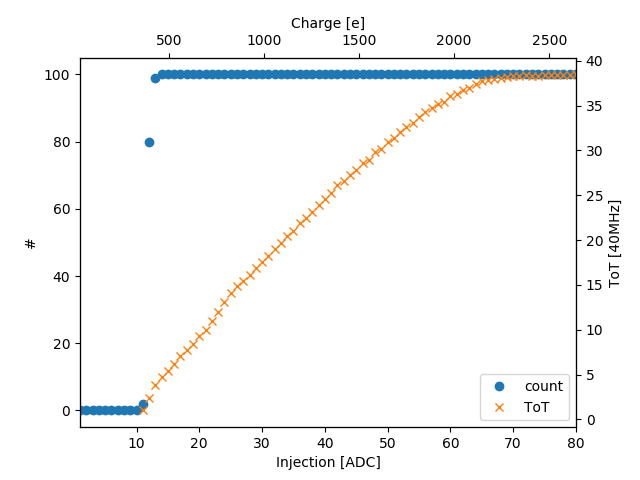

In [134]:
### plot

print "approx. th=",injlist[np.argmin(np.abs(cnt-repeat/2))],"DAC",injlist[np.argmin(np.abs(cnt-repeat/2))]*CALCAP,"e"
fig,ax=plt.subplots(1,1)
ax.plot(injlist,cnt,"C0o",label="count")
ax2=ax.twiny()
ax3=ax.twinx()
ax3.plot(injlist,tot,"C1x",label="ToT")
ax.plot([],[],"C1x",label="ToT")

ax.set_xlabel("Injection [ADC]")
ax.set_ylabel("#")
ax3.set_ylabel("ToT [40MHz]")
ax2.set_xlabel("Charge [e]")
ax.set_xbound(np.min(injlist),np.max(injlist))
ax2.set_xbound(np.min(injlist)*CALCAP,np.max(injlist)*CALCAP)
ax.legend()